In [1]:
from keras.datasets import mnist
data = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

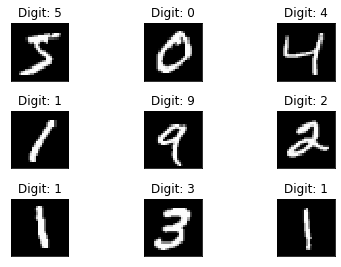

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

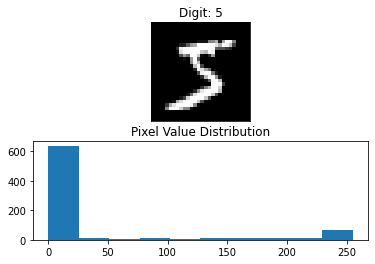

In [5]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [6]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [7]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [0]:
model = Sequential()

#1st hidden layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
#model.add(Dropout(0.2))

#2nd hidden layer
model.add(Dense(784))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

#3rd hidden layer
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               402192    
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [0]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





 - 11s - loss: 1.0839 - acc: 0.7495 - val_loss: 0.4703 - val_acc: 0.8828
Epoch 2/20
 - 2s - loss: 0.4022 - acc: 0.8907 - val_loss: 0.3365 - val_acc: 0.9046
Epoch 3/20
 - 2s - loss: 0.3214 - acc: 0.9088 - val_loss: 0.2912 - val_acc: 0.9160
Epoch 4/20
 - 2s - loss: 0.2824 - acc: 0.9200 - val_loss: 0.2608 - val_acc: 0.9265
Epoch 5/20
 - 2s - loss: 0.2565 - acc: 0.9265 - val_loss: 0.2359 - val_acc: 0.9324
Epoch 6/20
 - 2s - loss: 0.2353 - acc: 0.9333 - val_loss: 0.2212 - val_acc: 0.9360
Epoch 7/20
 - 2s - loss: 0.2183 - acc: 0.9379 - val_loss: 0.2060 - val_acc: 0.9413
Epoch 8/20
 - 2s - loss: 0.2035 - acc: 0.9420 - val_loss: 0.1948 - val_acc: 0.9434
Epoch 9/20
 - 2s - loss: 0.1903 - acc: 0.9456 - val_loss: 0.1871 - val_acc: 0.9456
Epoch 10/20
 - 2s - loss: 0.1793 - acc: 0.9487 - val_loss: 0.1733 - val_acc: 0.9497
Epoch 11/20
 - 2

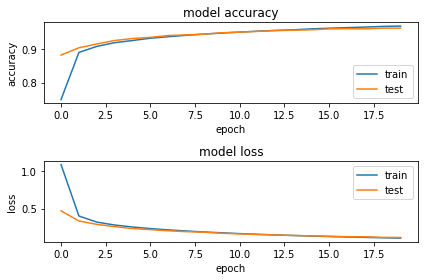

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [0]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.11787947653234004
Test Accuracy 0.9634



9634  classified correctly
366  classified incorrectly


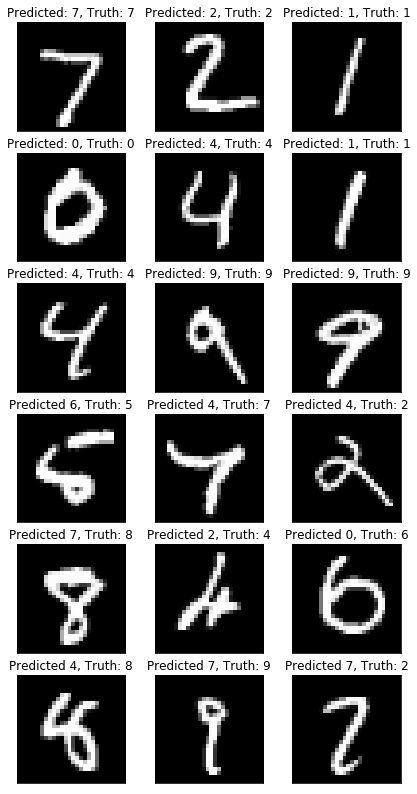

In [0]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation